In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/')


In [4]:
from __future__ import division
import pandas as pd
import os
from scipy import stats
from utils import loadmat
import scipy.io as spio
import matplotlib.gridspec as gridspec
from utils.sci_notation import sci_notation

In [6]:
savedir = '/home/knight/matar/NHB_submission_2017'
savefig = True

## plot "single trials" by ROI 

In [74]:
xlfilePath = (os.path.join(savedir, 'ROI_latencies_by_dataset.xlsx'))
onsets_data = pd.read_excel(xlfilePath, sheetname='onsets')
lats_data = pd.read_excel(xlfilePath, sheetname='peaks')
rts_data = pd.read_excel(xlfilePath, sheetname='rts')

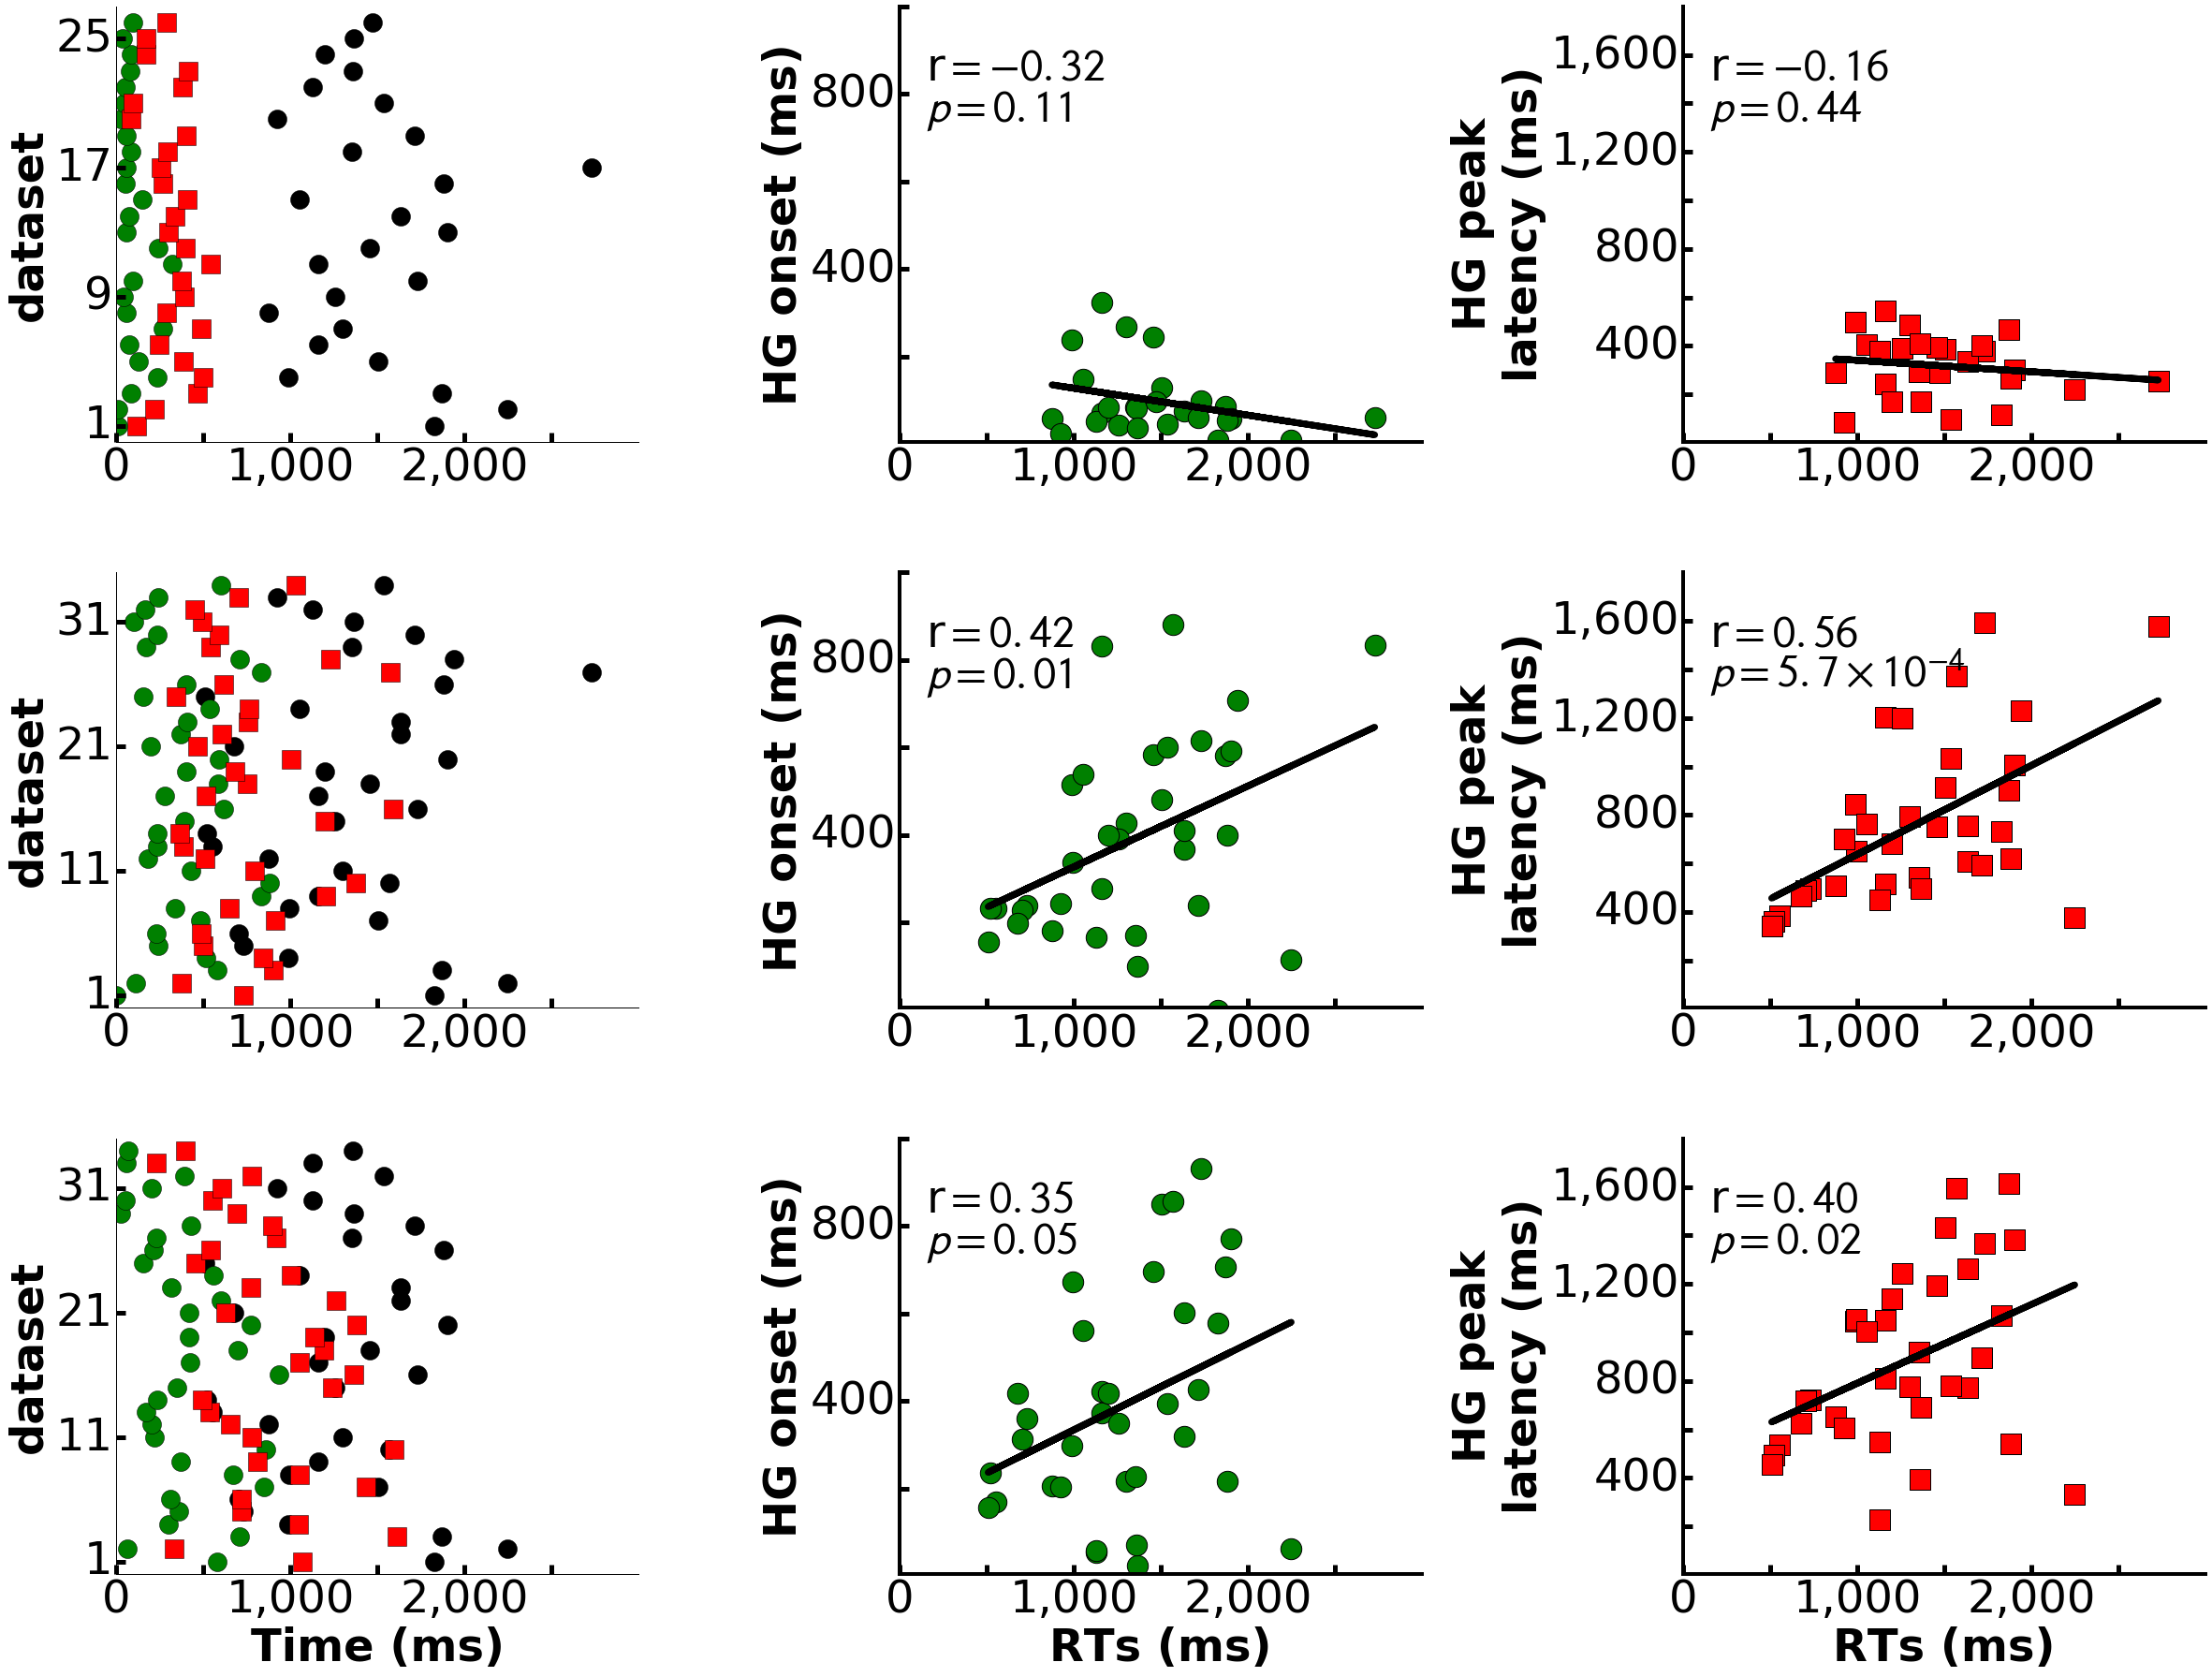

In [78]:
f, ax = plt.subplots(3,3, figsize = (40,30))


for i, r in enumerate(['Sensory','PFC','Motor']):
    
    onsets = onsets_data[r].dropna().values
    rts = rts_data[r].dropna().values
    lats = lats_data[r].dropna().values
    num_datasets = onsets.shape[0]
    
    #single trials
    ax[i,0].plot(rts, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 20, label = 'RT')
    ax[i,0].plot(onsets, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 20, label = 'HG onset')
    ax[i,0].plot(lats, np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 20)# label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[i,0].set_ylabel('dataset', weight = 'bold', fontsize = 48)
    ax[i,0].set_xlim([0,3000])
    ax[i,0].xaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
    ax[i,0].yaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
    ax[i,0].tick_params(axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].spines['left'].set_bounds(-1, num_datasets)
    ax[i,0].spines['bottom'].set_bounds(0, 3000)
    ax[i,0].set_xticks(np.arange(0, 3000, 500))    
    ax[i,0].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks)
    ax[i,0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.setp(ax[i,0].get_xticklabels()[1::2], visible=False)
    ax[i,0].set_ylim([-1, num_datasets]) #change yaxis indexing
    ylab = ax[i,0].get_yticks()
    ax[i,0].set_yticklabels((ylab+1).astype(int))
    ax[-1,0].set_xlabel('Time (ms)', weight = 'bold', fontsize = 48)
    
    #scatterplots - HGonsets
    ax[i,1].scatter(rts, onsets, marker = 'o', s = 500, facecolor = 'g')
    R, p = stats.pearsonr(onsets, rts)
    ax[i,1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)
    ax[i,2].set_ylim([0,1000])
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets))[0]
    ax[i,1].plot(rts,rts*m+c, color = 'k', linewidth = 7) 

    if r != 'R':
        if p > 0.001:
            ax[i,1].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,1].text(0.05, 0.71, r"$p = {%.2f}$" %(p), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
        else:
            ax[i,1].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,1].text(0.05, 0.71, r"$p = $%s" %(sci_notation(p)), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
    else: #R placement different
        ax[i,1].text(0.5, 0.16, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,1].text(0.5, 0.06, r"$p = $%s" %(sci_notation(p)), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            
    ax[i,1].set_ylim(ymax = 1000)
    ax[i,1].set_yticks(np.arange(0, 1100, 200))

    #scatterplots - latencies
    ax[i,2].scatter(rts, lats, marker = 's', s = 500, facecolor = 'r')
    R, p = stats.pearsonr(lats, rts)
    ax[i,2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    ax[i,2].set_ylim([0, 1700])
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats))[0]
    ax[i,2].plot(rts,rts*m+c, color = 'k', linewidth = 7, label = 'r = %.2f\np = %.3f' %(R, p)) 
    
    if r != 'R':
        if p > 0.001:
            ax[i,2].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,2].text(0.05, 0.71, r"$p = {%.2f}$" %(p), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
        else:
            ax[i,2].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,2].text(0.05, 0.71, r"$p = $%s" %(sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
    else: #R placement different
        ax[i,2].text(0.5, 0.16, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,2].text(0.5, 0.06, r"$p = $%s" %(sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

    ax[i,2].set_ylim(ymax = 1800)
    ax[i,2].set_yticks(np.arange(0, 1800, 200))

    for a in range(1,3):
        ax[i,a].patch.set_facecolor('white')
        #ax[i,a].autoscale(tight=True)
        ax[i,a].spines['top'].set_visible(False)
        ax[i,a].spines['right'].set_visible(False)
        ax[i,a].spines['bottom'].set_linewidth(4)
        ax[i,a].spines['left'].set_linewidth(4)
        ax[i,a].get_xaxis().tick_bottom()
        ax[i,a].get_yaxis().tick_left()
        ax[i,a].xaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
        ax[i,a].yaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
        ax[i,a].set_xlim([0, 3000])
        ax[i,a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
        ax[i,a].spines['bottom'].set_bounds(0, 3000)
        ax[i,a].set_xticks(np.arange(0, 3000, 500))
        #ax[i,a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
        #ax[-1,a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
        plt.setp(ax[i,a].get_xticklabels()[1::2], visible=False)
        plt.setp(ax[i,a].get_yticklabels()[1::2], visible=False)
        ax[i,a].set_ylim(bottom=5)
        ax[i,a].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[i,a].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[-1,a].set_xlabel('RTs (ms)', weight = 'bold', fontsize = 48)
    
f.subplots_adjust(wspace = 0.5)
f.subplots_adjust(hspace = 0.3)

filename = os.path.join(savedir, 'Supp4_dataset_trials_byROI.png')
f.savefig(filename, bbox_inches='tight', dpi = 150)


## plot "single trials" by pattern 

In [79]:
xlfilePath = (os.path.join(savedir, 'HG_types_latencies_by_dataset.xlsx'))
onsets_data = pd.read_excel(xlfilePath, sheetname='onsets')
lats_data = pd.read_excel(xlfilePath, sheetname='peaks')
rts_data = pd.read_excel(xlfilePath, sheetname='rts')

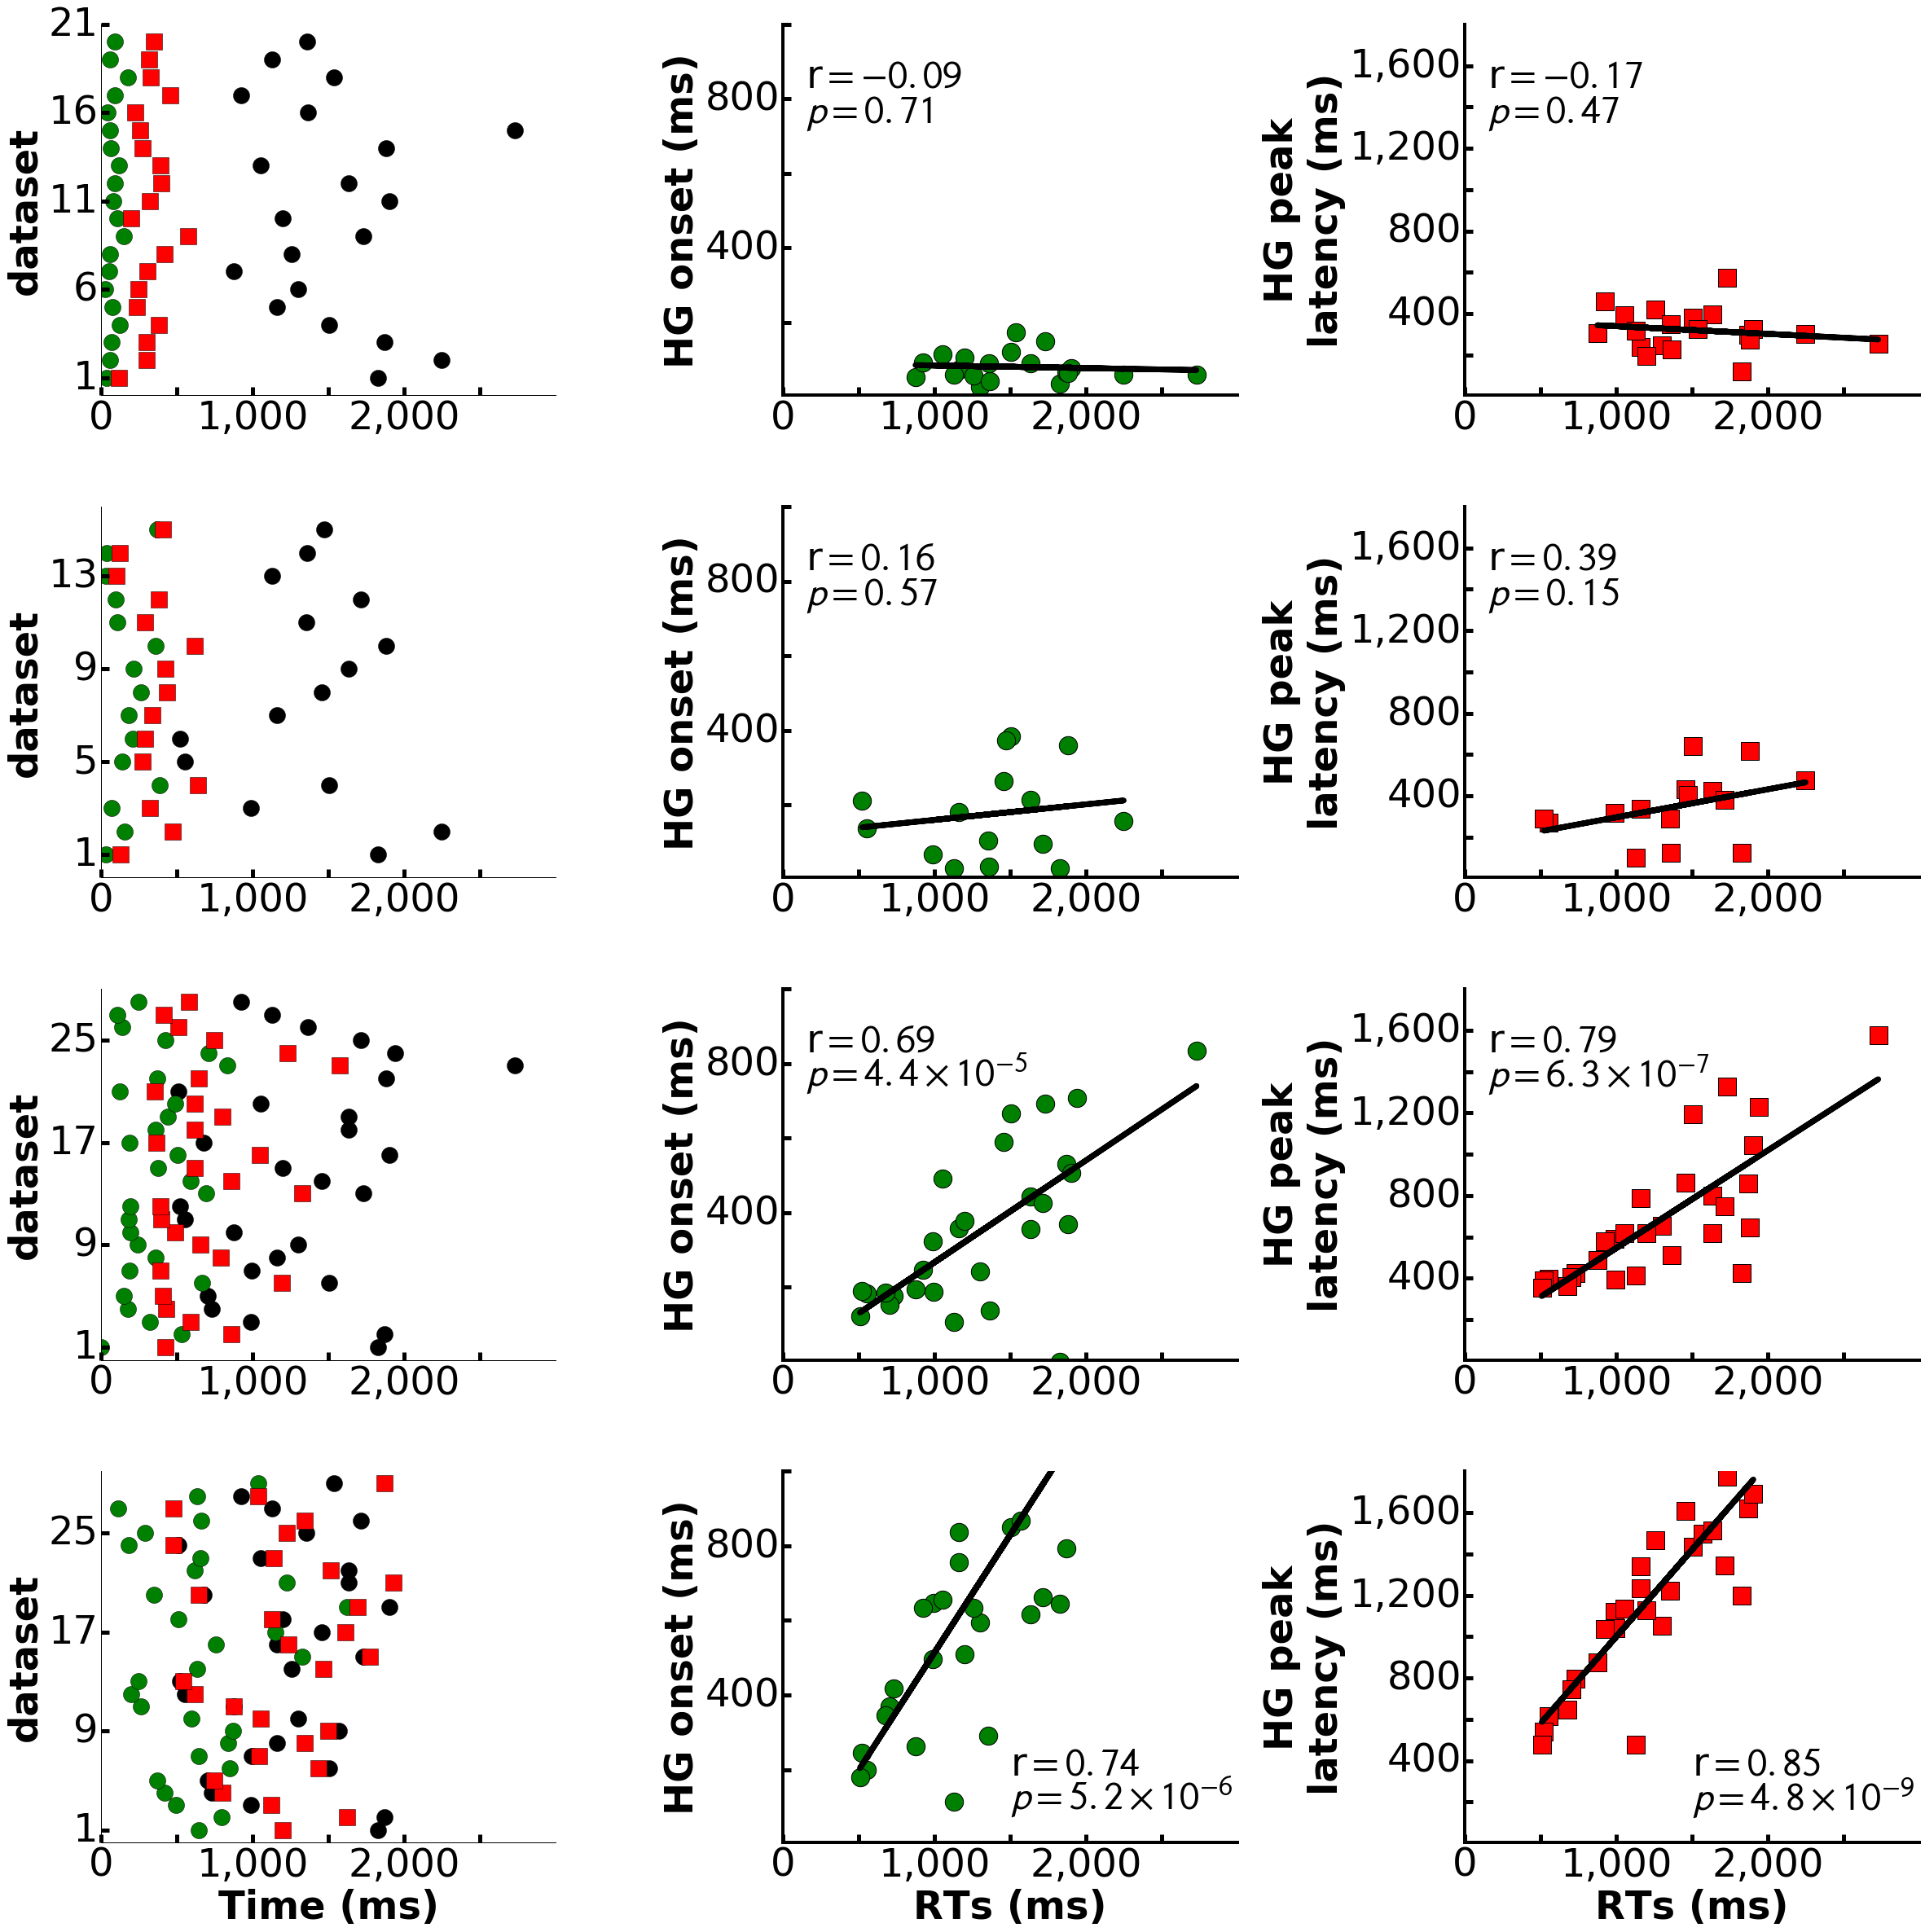

In [84]:
f, ax = plt.subplots(4,3, figsize = (40,40))

for i, r in enumerate(['Early Stim','Late Stim','Persistent','Response']):
    
    
    onsets = onsets_data[r].dropna().values
    rts = rts_data[r].dropna().values
    lats = lats_data[r].dropna().values
    num_datasets = onsets.shape[0]  
    
    #single trials
    ax[i,0].plot(rts, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 20, label = 'RT')
    ax[i,0].plot(onsets, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 20, label = 'HG onset')
    ax[i,0].plot(lats, np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 20)# label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[i,0].set_ylabel('dataset', weight = 'bold', fontsize = 48)
    ax[i,0].set_xlim([0,3000])
    ax[i,0].xaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
    ax[i,0].yaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
    ax[i,0].tick_params(axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].spines['left'].set_bounds(-1, num_datasets)
    ax[i,0].spines['bottom'].set_bounds(0, 3000)
    ax[i,0].set_xticks(np.arange(0, 3000, 500))    
    ax[i,0].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks)
    ax[i,0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.setp(ax[i,0].get_xticklabels()[1::2], visible=False)
    ax[i,0].set_ylim([-1, num_datasets]) #change yaxis indexing
    ylab = ax[i,0].get_yticks()
    ax[i,0].set_yticklabels((ylab+1).astype(int))
    ax[-1,0].set_xlabel('Time (ms)', weight = 'bold', fontsize = 48)
    
    #scatterplots - HGonsets
    ax[i,1].scatter(rts, onsets, marker = 'o', s = 500, facecolor = 'g')
    R, p = stats.pearsonr(onsets, rts)
    ax[i,1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 48)
    ax[i,2].set_ylim([0,1000])
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets))[0]
    ax[i,1].plot(rts,rts*m+c, color = 'k', linewidth = 7) 

    if r != 'Response':
        if p > 0.001:
            ax[i,1].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,1].text(0.05, 0.71, r"$p = {%.2f}$" %(p), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
        else:
            ax[i,1].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,1].text(0.05, 0.71, r"$p = $%s" %(sci_notation(p)), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
    else: #R placement different
        ax[i,1].text(0.5, 0.16, r"r$ = {%.2f}$" %(R), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,1].text(0.5, 0.06, r"$p = $%s" %(sci_notation(p)), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            
    ax[i,1].set_ylim(ymax = 1000)
    ax[i,1].set_yticks(np.arange(0, 1100, 200))

    #scatterplots - latencies
    ax[i,2].scatter(rts, lats, marker = 's', s = 500, facecolor = 'r')
    R, p = stats.pearsonr(lats, rts)
    ax[i,2].set_ylabel('HG peak\nlatency (ms)',weight = 'bold', fontsize = 48)
    ax[i,2].set_ylim([0, 1700])
    
    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats))[0]
    ax[i,2].plot(rts,rts*m+c, color = 'k', linewidth = 7, label = 'r = %.2f\np = %.3f' %(R, p)) 
    
    if r != 'Response':
        if p > 0.001:
            ax[i,2].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,2].text(0.05, 0.71, r"$p = {%.2f}$" %(p), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)        
        else:
            ax[i,2].text(0.05, 0.81, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
            ax[i,2].text(0.05, 0.71, r"$p = $%s" %(sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
    else: #R placement different
        ax[i,2].text(0.5, 0.16, r"r$ = {%.2f}$" %(R), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)
        ax[i,2].text(0.5, 0.06, r"$p = $%s" %(sci_notation(p)), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 48)

    ax[i,2].set_ylim(ymax = 1800)
    ax[i,2].set_yticks(np.arange(0, 1800, 200))

    for a in range(1,3):
        ax[i,a].patch.set_facecolor('white')
        #ax[i,a].autoscale(tight=True)
        ax[i,a].spines['top'].set_visible(False)
        ax[i,a].spines['right'].set_visible(False)
        ax[i,a].spines['bottom'].set_linewidth(4)
        ax[i,a].spines['left'].set_linewidth(4)
        ax[i,a].get_xaxis().tick_bottom()
        ax[i,a].get_yaxis().tick_left()
        ax[i,a].xaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
        ax[i,a].yaxis.set_tick_params(labelsize = 48, length = 10, width = 5)
        ax[i,a].set_xlim([0, 3000])
        ax[i,a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
        ax[i,a].spines['bottom'].set_bounds(0, 3000)
        ax[i,a].set_xticks(np.arange(0, 3000, 500))
        #ax[i,a].yaxis.set_major_locator(MaxNLocator(nbins=5)) # with 3 bins you will have 4 ticks
        #ax[-1,a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 48)
        plt.setp(ax[i,a].get_xticklabels()[1::2], visible=False)
        plt.setp(ax[i,a].get_yticklabels()[1::2], visible=False)
        ax[i,a].set_ylim(bottom=5)
        ax[i,a].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[i,a].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[-1,a].set_xlabel('RTs (ms)', weight = 'bold', fontsize = 48)
    
f.subplots_adjust(wspace = 0.5)
f.subplots_adjust(hspace = 0.3)

filename = os.path.join(savedir, 'Supp10_dataset_trials_byPattern.png')
f.savefig(filename, bbox_inches='tight', dpi = 150)
